In [12]:
import cv2
from google.colab.patches import cv2_imshow

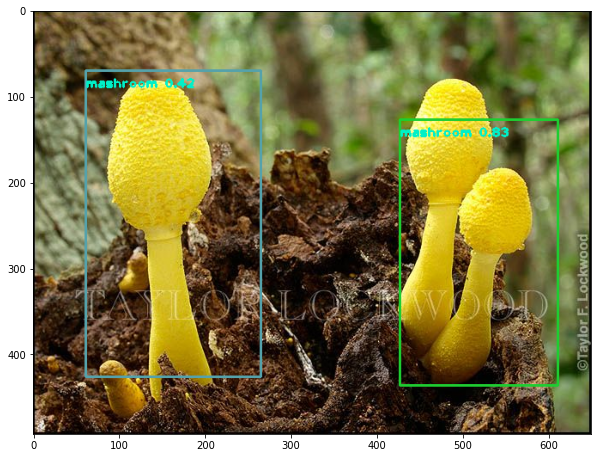

In [54]:
from numpy.core.fromnumeric import size
from re import S
import cv2
import numpy as np

cfg= "/content/drive/MyDrive/testing custom detection/yolov3_custom.cfg"
weight="/content/drive/MyDrive/testing custom detection/yolov3_custom_final.weights"
net = cv2.dnn.readNet(weight,cfg)

classes = []
with open("/content/drive/MyDrive/testing custom detection/classes.names", "r") as f:
    classes = f.read().splitlines()

#cap = cv2.VideoCapture('video4.mp4')
#cap = 'test_images/<your_test_image>.jpg'
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(100, 3))

#while True:
    #_, img = cap.read()
img = cv2.imread("/content/drive/MyDrive/testing custom detection/2.jpg")
height, width, _ = img.shape

blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)
net.setInput(blob)
output_layers_names = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_names)

boxes = []
confidences = []
class_ids = []

for output in layerOutputs:
  for detection in output:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.2:
      center_x = int(detection[0]*width)
      center_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x, y, w, h])
      confidences.append((float(confidence)))
      class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.4)


  if len(indexes)>0:
    for i in indexes.flatten():
      x, y, w, h = boxes[i]
      label = str(classes[class_ids[i]])
      confidence = str(round(confidences[i],2))
      color = colors[i]
      cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
      cv2.putText(img, label + " " + confidence, (x, y+20), font, 1, (200,240,0), 2)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
#plt.axis('off')
plt.show()
